## 1 Linear Least Squares Regression

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
442 10
(442,)


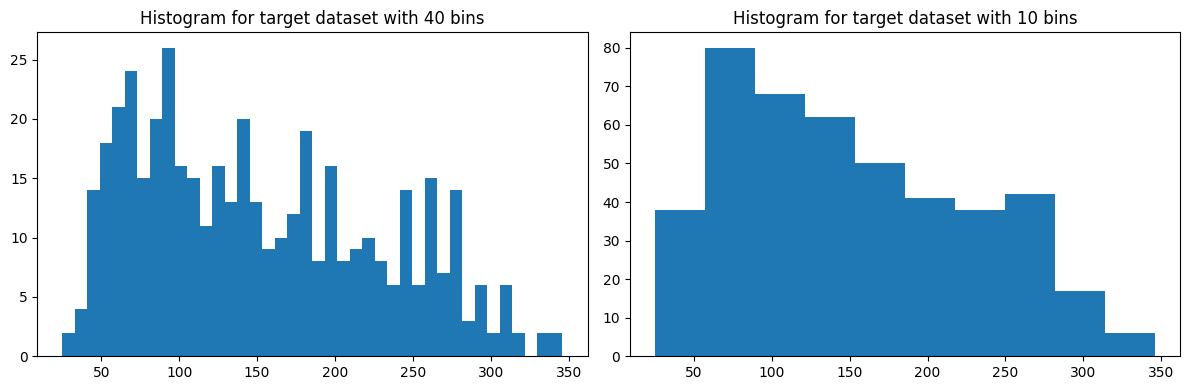

In [65]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
print(X[0])
t = diabetes.target
# Inspect sizes
#
NumData, NumFeatures = X.shape
print(NumData, NumFeatures) # 442 X 10
print(t.shape) # 442
# Plot and save
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(t, bins=40)
ax[0].set_title("Histogram for target dataset with 40 bins")
ax[1].hist(t, bins=10)
ax[1].set_title("Histogram for target dataset with 10 bins")
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

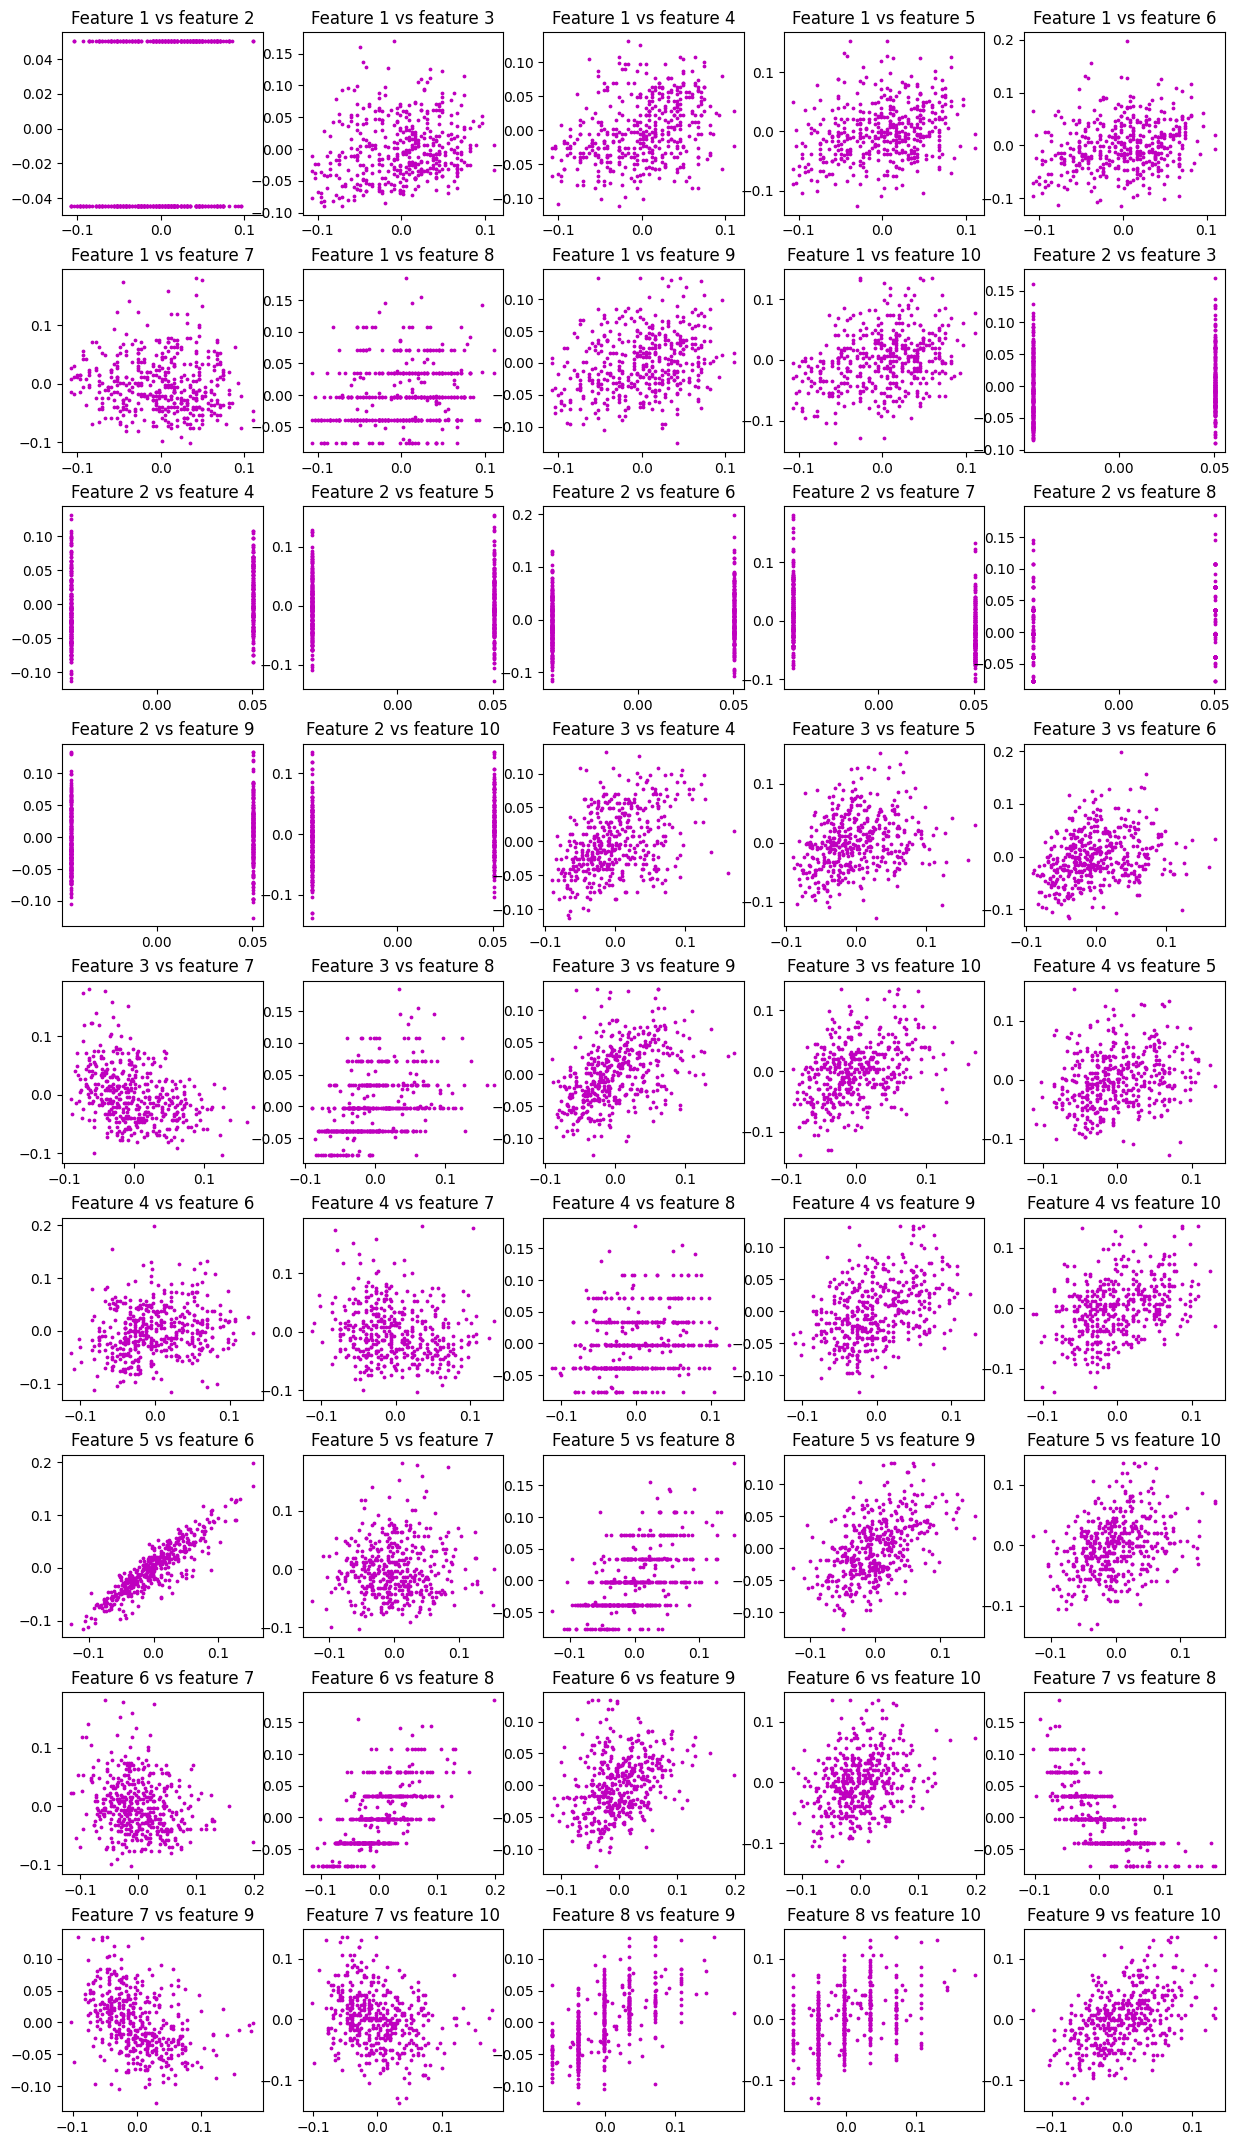

In [66]:
fig, ax = plt.subplots(nrows=9, ncols=5, figsize=(15, 27))
n = 0
m = 0
for i in range(10):
    for j in range(i+1, 10):
        ax[n][m].scatter(X[:, i], X[:, j], c='m', s=3)
        ax[n][m].set_title('Feature {0} vs feature {1}'.format(i+1,j+1))
        m += 1
        if m == 5:
            m = 0
            n += 1  # Move to the next row when reaching the end of a row

plt.subplots_adjust(hspace=0.3)

Text(0.5, 1.0, 't vs t-predicted by pseudo-inverse method')

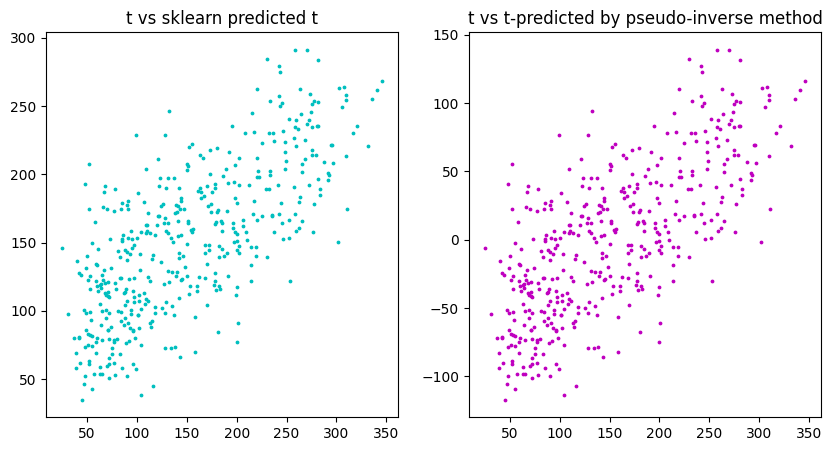

In [67]:
# Linear regression using sklearn
#
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)
# Pseudo-incerse solution to linear regression
#
w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[0].set_title("t vs sklearn predicted t")
ax[1].scatter(t, th2, c='m', s=3)
ax[1].set_title("t vs t-predicted by pseudo-inverse method")

## 2 Regularization

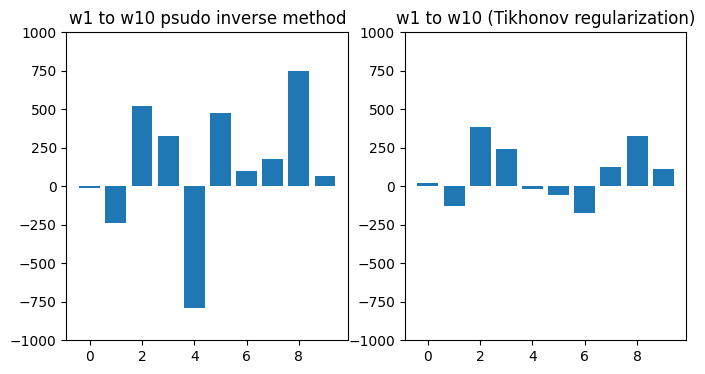

In [68]:
gamma = 0.5
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].set_ylim(-1000, 1000)
ax[0].set_title("w1 to w10 psudo inverse method")
ax[0].bar(np.arange(len(w)), w)
ax[1].set_ylim(-1000, 1000)
ax[1].set_title("w1 to w10 (Tikhonov regularization)")
ax[1].bar(np.arange(len(w)), wR)
plt.savefig("LeastSquaresAndRegularizedWeights.jpg")

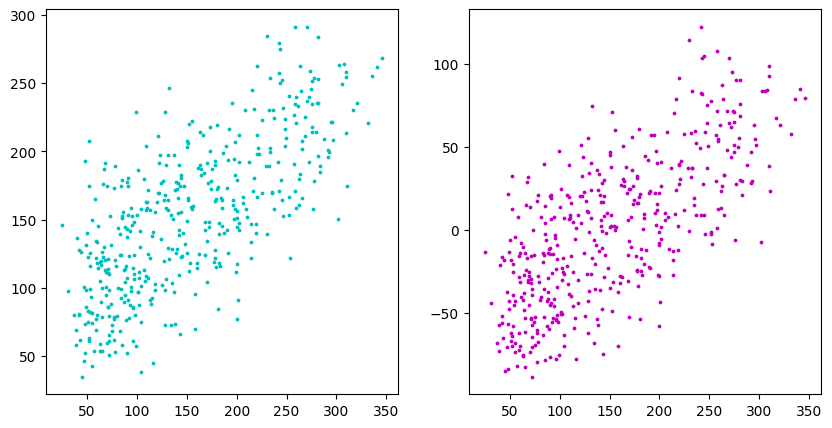

In [69]:
# Linear regression using sklearn
#
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)
# Pseudo-incerse solution with "Tikhonov regularization" to linear regression
#
th3 = X @ wR
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[1].scatter(t, th3, c='m', s=3)

## Sparse Regression

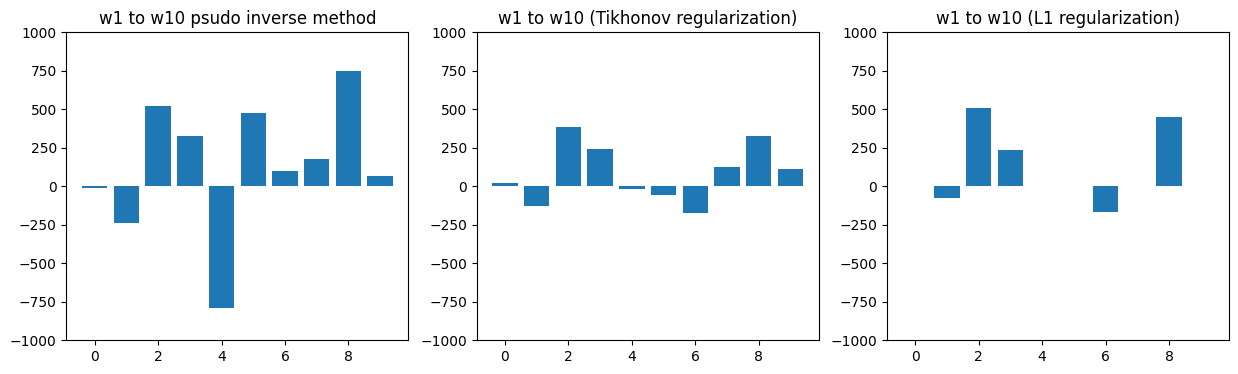

In [70]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)
wP = np.linalg.inv(X.T @ X) @ X.T @ th_lasso
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].set_ylim(-1000, 1000)
ax[0].set_title("w1 to w10 psudo inverse method")
ax[0].bar(np.arange(len(w)), w)
ax[1].set_ylim(-1000, 1000)
ax[1].set_title("w1 to w10 (Tikhonov regularization)")
ax[1].bar(np.arange(len(w)), wR)
ax[2].set_ylim(-1000, 1000)
ax[2].set_title("w1 to w10 (L1 regularization)")
ax[2].bar(np.arange(len(w)), wP)
plt.savefig("solutions.png")


In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.
N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
    Z1= np.random.randn()
    Z2= np.random.randn()
    y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
    X = np.vstack ((X, Xarr.tolist()))

Computing regularization path using the LARS ...
.

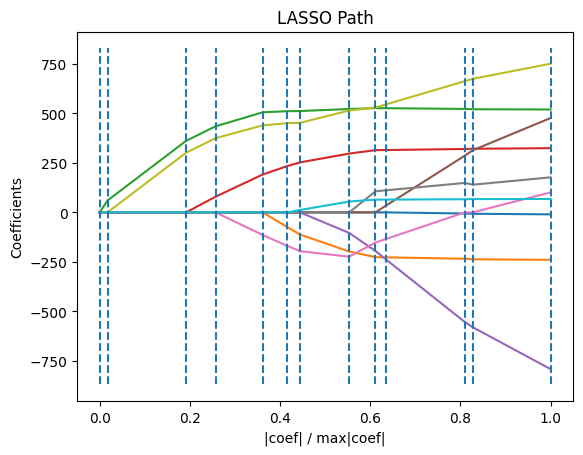

In [72]:
# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

This plot helps in understanding how the coefficients of the features change as the amount of regularization varies. It also provides insights into feature selection, as coefficients that become zero indicate features that are not included in the model due to regularization.

(932, 2251)
(932,)


c:\Users\Eshan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.601e+02, tolerance: 2.715e-01
  model = cd_fast.enet_coordinate_descent(


(-0.5, 0.5)

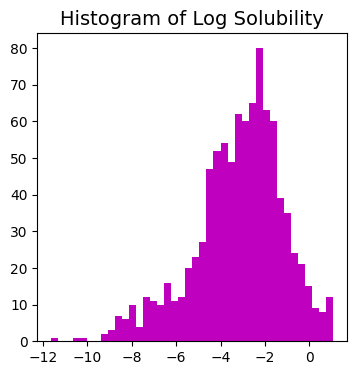

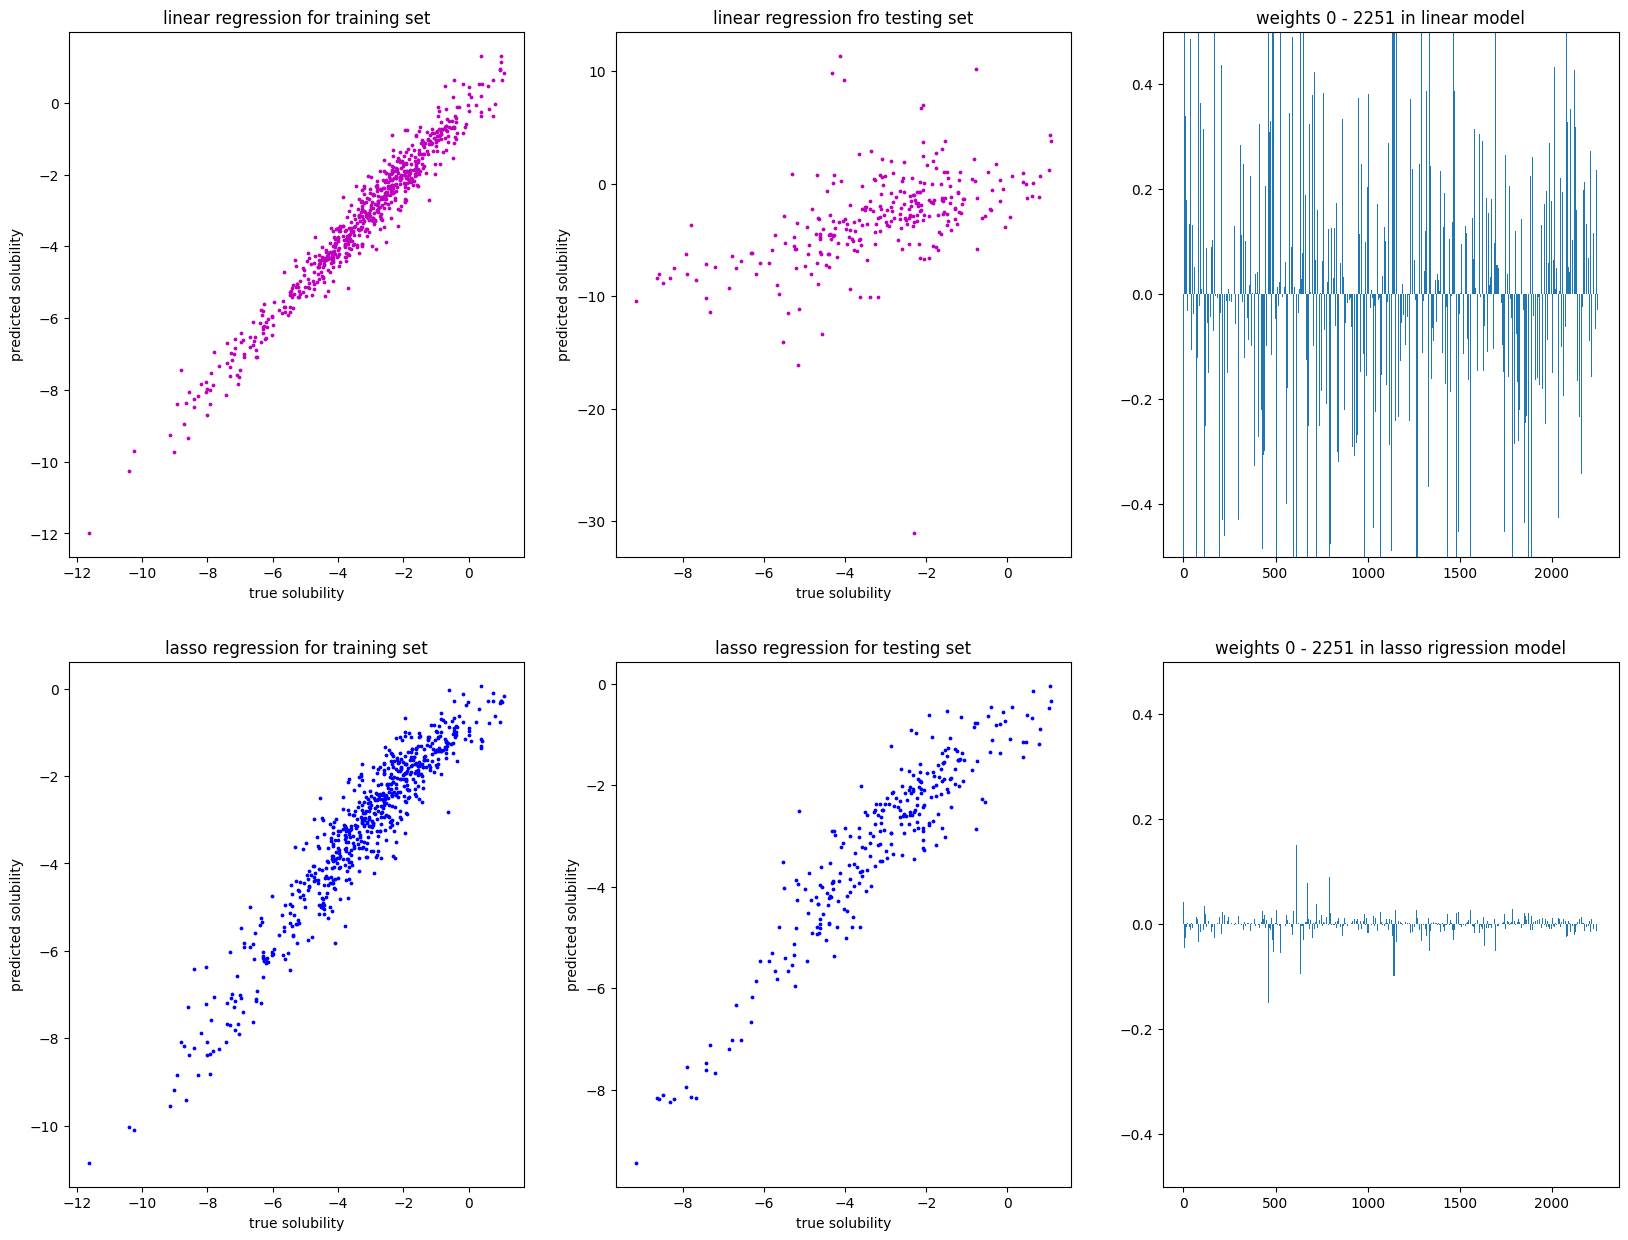

In [101]:
import pandas as pd

sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", verbose=False)
# print(sol.shape)
# print(sol.columns)
t = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(t, bins=40, facecolor='m')
ax.set_title("Histogram of Log Solubility", fontsize=14)
colnames = sol.columns
lst = colnames[5:-1].tolist()
lst.append(colnames[-1][0:12])
colnames = pd.Index(lst)
X = sol[colnames[5:len(colnames)]].astype(np.float32)

N, p = X.shape
print(X.shape)
print(t.shape)

# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
# Regularized regression
#

gamma = 2.3
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w.to_numpy()
th_test = X_test @ w.to_numpy()

# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
ax[0][0].scatter(t_train, th_train, c='m', s=3)
ax[0][0].set_title('linear regression for training set')
ax[0][0].set_xlabel('true solubility')
ax[0][0].set_ylabel('predicted solubility')
ax[0][1].scatter(t_test, th_test, c='m', s=3)
ax[0][1].set_title('linear regression fro testing set')
ax[0][1].set_xlabel('true solubility')
ax[0][1].set_ylabel('predicted solubility')
ax[0][2].bar(np.arange(len(w)), w)
ax[0][2].set_title('weights 0 - 2251 in linear model')
ax[0][2].set_ylim(-0.5, 0.5)
#
# Over to you for implementing Lasso
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X_train, t_train)
th_lasso = ll.predict(X_train)
wp = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ th_lasso
th_train = X_train @ wp.to_numpy()
th_test = X_test @ wp.to_numpy()

# Plot training and test predictions
#
ax[1][0].scatter(t_train, th_train, c='b', s=3)
ax[1][0].set_title('lasso regression for training set')
ax[1][0].set_xlabel('true solubility')
ax[1][0].set_ylabel('predicted solubility')
ax[1][1].scatter(t_test, th_test, c='b', s=3)
ax[1][1].set_title('lasso regression for testing set')
ax[1][1].set_xlabel('true solubility')
ax[1][1].set_ylabel('predicted solubility')
ax[1][2].bar(np.arange(len(wp)), wp)
ax[1][2].set_title('weights 0 - 2251 in lasso rigression model')
ax[1][2].set_ylim(-0.5, 0.5)

In [115]:
# Get the absolute coefficients from the Lasso regression model
lasso_coefficients = np.abs(wp)

# Get the indices of the top ten features with the highest absolute coefficients
top_ten_indices = np.argsort(lasso_coefficients)[::-1][:10]

# Get the names of the top ten features
top_ten_features = X.columns[top_ten_indices]

print("Top ten features for predicting solubility:")
print(top_ten_features)
print(top_ten_indices)

Top ten features for predicting solubility:
Index(['SpDiam_Dz(Z)', 'SpDiam_Dz(m)', 'P_VSA_i_2', 'P_VSA_m_4', 'AVS_D',
       'SpPos_Dz(i)', 'SpMax_Dz(Z)', 'Dz', 'P_VSA_v_3', 'Wi_B(p)'],
      dtype='object')
2250     464
2249     495
2248    1159
2247    1144
2246     286
2245     614
2244     462
2243      88
2242    1148
2241     726
dtype: int64


In [116]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Select the top ten features based on their weights from Lasso regression
top_feature_indices = np.argsort(np.abs(wp))[-10:]
top_features = X.columns[top_feature_indices]
print("Top ten features:", top_features)

# Select only the top ten features from the dataset
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Fit a Ridge regression model with quadratic regularization to all features
ridge = Ridge(alpha=0.2)
ridge.fit(X_train, t_train)
t_pred_ridge_all = ridge.predict(X_test)

# Fit a Ridge regression model with quadratic regularization to top ten features
ridge_top = Ridge(alpha=0.2)
ridge_top.fit(X_train_top, t_train)
t_pred_ridge_top = ridge_top.predict(X_test_top)

# Calculate mean squared error for both models
mse_ridge_all = mean_squared_error(t_test, t_pred_ridge_all)
mse_ridge_top = mean_squared_error(t_test, t_pred_ridge_top)

print("Mean Squared Error (All features):", mse_ridge_all)
print("Mean Squared Error (Top ten features):", mse_ridge_top)


Top ten features: Index(['Wi_B(p)', 'P_VSA_v_3', 'Dz', 'SpMax_Dz(Z)', 'SpPos_Dz(i)', 'AVS_D',
       'P_VSA_m_4', 'P_VSA_i_2', 'SpDiam_Dz(m)', 'SpDiam_Dz(Z)'],
      dtype='object')


c:\Users\Eshan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Mean Squared Error (All features): 0.6806246196273023
Mean Squared Error (Top ten features): 1.0343758086360948
